# **NM ASSIGNMENT - 3**

**Name    :Tharun P             
Roll No: 2020115097            
College: College of Engineering Guindy**

# **Importing Libraries**

In [8]:
from tensorflow import keras
import tensorflow as tf

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
# from keras.preprocessing.image import load_img
from keras.utils import load_img,img_to_array

# **Data Augmentation**

In [3]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    zoom_range=0.2,
                                    shear_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.2)

train_dataset = data_generator.flow_from_directory(directory='/kaggle/input/animal-image-dataset-90-different-animals/animals/animals',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='training')
val_dataset = data_generator.flow_from_directory(directory='/kaggle/input/animal-image-dataset-90-different-animals/animals/animals',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  subset='validation')

Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


# **Defining Model**

In [4]:
model = keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(128, activation='relu'),
    Dense(90, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 32)                5

# **Training the Model**

In [5]:
history = model.fit(train_dataset,epochs=30,validation_data=val_dataset)

Epoch 1/30
135/135 [==============================] - 176s 1s/step - loss: 4.4399 - accuracy: 0.0241 - val_loss: 4.3361 - val_accuracy: 0.0380
Epoch 2/30
135/135 [==============================] - 123s 916ms/step - loss: 4.2473 - accuracy: 0.0472 - val_loss: 4.1937 - val_accuracy: 0.0528
Epoch 3/30
135/135 [==============================] - 123s 910ms/step - loss: 4.0446 - accuracy: 0.0697 - val_loss: 4.0004 - val_accuracy: 0.0852
Epoch 4/30
135/135 [==============================] - 123s 911ms/step - loss: 3.7934 - accuracy: 0.1049 - val_loss: 3.7933 - val_accuracy: 0.1037
Epoch 5/30
135/135 [==============================] - 122s 908ms/step - loss: 3.3902 - accuracy: 0.1690 - val_loss: 3.5832 - val_accuracy: 0.1426
Epoch 7/30
135/135 [==============================] - 122s 901ms/step - loss: 3.2408 - accuracy: 0.2102 - val_loss: 3.5127 - val_accuracy: 0.1843
Epoch 8/30
135/135 [==============================] - 122s 904ms/step - loss: 3.1397 - accuracy: 0.2211 - val_loss: 3.5396 - va

In [6]:
model.save('animals.h5')

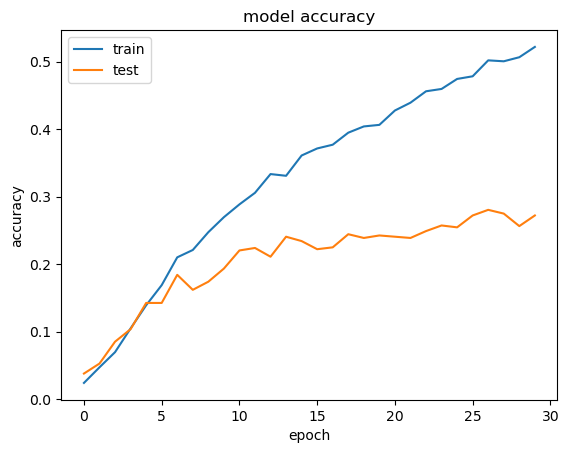

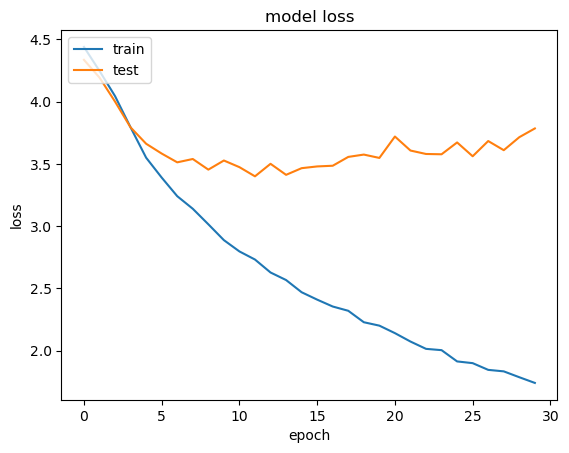

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Testing the Model**

1/1 [==============================] - 0s 24ms/step


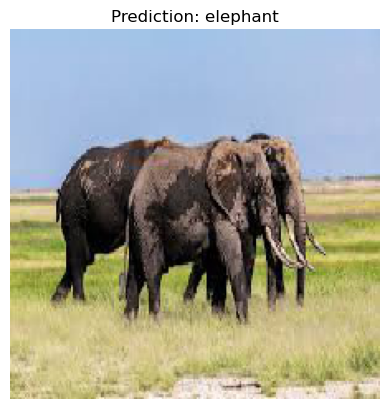

1/1 [==============================] - 0s 21ms/step


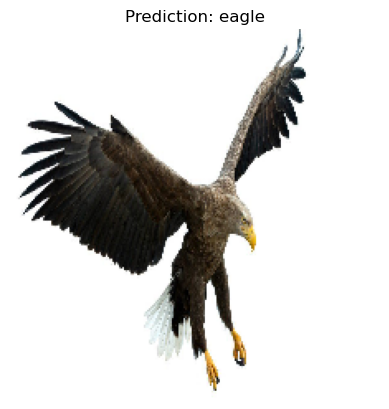

1/1 [==============================] - 0s 23ms/step


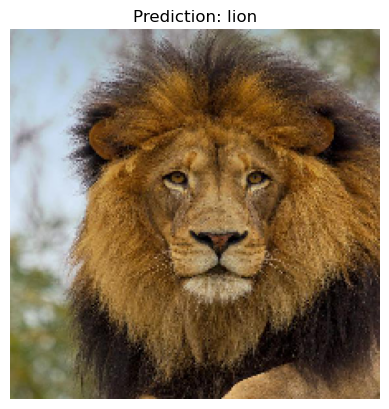

1/1 [==============================] - 0s 43ms/step


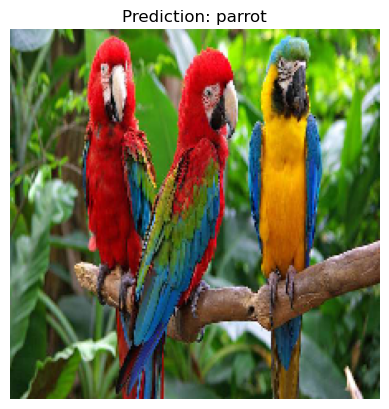

In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
class_labels = list(train_dataset.class_indices.keys())
imgs=['elephant/2efd71c54e.jpg','eagle/3df1379a57.jpg','lion/2d670c088a.jpg','parrot/1f4f736dbf.jpg']
for path in imgs:
    img = load_img('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/'+path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    plt.imshow(img)
    plt.title('Prediction: {}'.format(predicted_class))
    plt.axis('off')
    plt.show()